In [ ]:
# 1. Dézipper le fichier .zip
!unzip lfw-funneled.tgz.zip

# 2. Extraire le .tgz (archive tar gzip)
!tar -xvzf lfw-funneled.tgz

In [ ]:


# 2. j"mports les biblio
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from collections import Counter

# 3. Variables
data_dir = 'lfw_funneled'  # dossier extrait
img_size = 64

# 4. Chargement images + labels
images = []
labels = []

for person_name in os.listdir(data_dir):
    person_folder = os.path.join(data_dir, person_name)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            try:
                img = Image.open(image_path).convert('RGB').resize((img_size, img_size))
                images.append(np.array(img))
                labels.append(person_name)
            except:
                print(f"Impossible de charger {image_path}")

print(f"Images chargées : {len(images)}")

# 5. Filtrage pour garder uniquement les personnes avec au moins 2 images
counts = Counter(labels)
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if counts[lbl] >= 2:
        filtered_images.append(img)
        filtered_labels.append(lbl)

print(f"Images après filtrage : {len(filtered_images)}")

# 6. Préparation des données
X = np.array(filtered_images) / 255.0
le = LabelEncoder()
y_enc = le.fit_transform(filtered_labels)
y = to_categorical(y_enc)

# 7. Split train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_enc
)

# 8. Création du modèle CNN simple
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 9. Entraînement (5 epochs, batch size 32)
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 10. Évaluation
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


Images chargées : 13233
Images après filtrage : 9164


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 44s 202ms/step - accuracy: 0.0512 - loss: 7.1039 - val_accuracy: 0.0613 - val_loss: 6.7879
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 37s 181ms/step - accuracy: 0.0591 - loss: 6.5345 - val_accuracy: 0.0777 - val_loss: 6.7177
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 40s 176ms/step - accuracy: 0.0758 - loss: 6.1403 - val_accuracy: 0.0926 - val_loss: 6.5594
Epoch 4/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - accuracy: 0.1087 - loss: 5.6140 - val_accuracy: 0.1008 - val_loss: 6.4359
Epoch 5/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 40s 168ms/step - accuracy: 0.1595 - loss: 4.9956 - val_accuracy: 0.1308 - val_loss: 6.8753
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.1343 - loss: 5.7041
Test Accuracy: 0.15


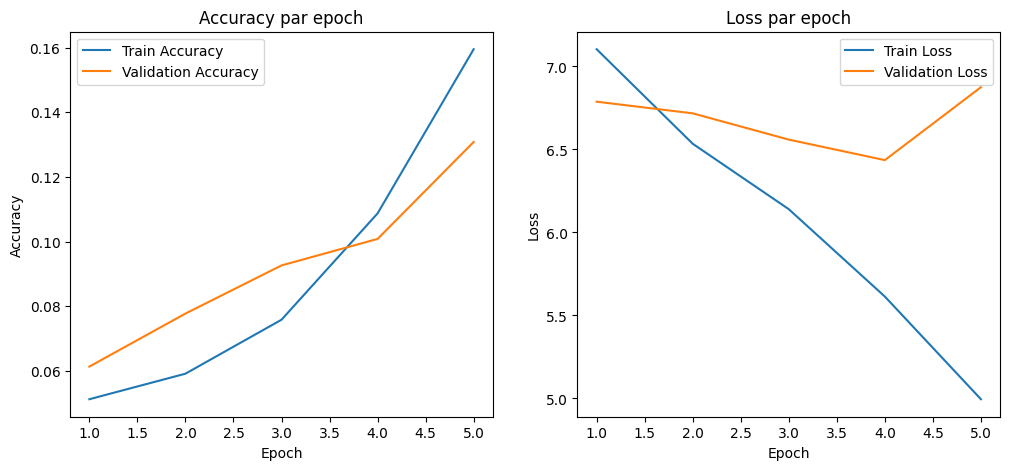

In [ ]:
import matplotlib.pyplot as plt

# Données extraites de ton log (exemple)
epochs = range(1, 6)

train_acc = [0.0512, 0.0591, 0.0758, 0.1087, 0.1595]
val_acc = [0.0613, 0.0777, 0.0926, 0.1008, 0.1308]

train_loss = [7.1039, 6.5345, 6.1403, 5.6140, 4.9956]
val_loss = [6.7879, 6.7177, 6.5594, 6.4359, 6.8753]

plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy par epoch')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss par epoch')
plt.legend()

plt.show()


In [ ]:
import os


In [ ]:
from PIL import Image
import numpy as np


In [8]:
from PIL import Image
import numpy as np

In [ ]:
# Nombre de classes dans y_train
num_classes_train = len(np.unique(np.argmax(y_train, axis=1)))
val_size = 0.1
min_val_samples = int(val_size * len(X_train))

if min_val_samples < num_classes_train:
    val_size = num_classes_train / len(X_train)
    print(f"Ajustement taille validation à {val_size:.3f} pour avoir au moins un exemple par classe.")

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=val_size, random_state=42, stratify=np.argmax(y_train, axis=1)
)


Ajustement taille validation à 0.148 pour avoir au moins un exemple par classe.


Images chargées : 13233
Images conservées (≥3 par personne) : 7606
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 242ms/step - accuracy: 0.0613 - loss: 6.5227 - val_accuracy: 0.0699 - val_loss: 6.0626
Epoch 2/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 39s 239ms/step - accuracy: 0.0666 - loss: 6.1223 - val_accuracy: 0.0699 - val_loss: 6.0618
Epoch 3/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step - accuracy: 0.0694 - loss: 5.9969 - val_accuracy: 0.0699 - val_loss: 5.9302
Epoch 4/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step - accuracy: 0.0739 - loss: 5.9266 - val_accuracy: 0.0755 - val_loss: 5.8308
Epoch 5/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step - accuracy: 0.0720 - loss: 5.8850 - val_accuracy: 0.0788 - val_loss: 5.7057
Epoch 6/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 39s 239ms/step - accuracy: 0.0780 - loss: 5.7153 - val_accuracy: 0.0866 - val_loss: 5.5822
Epoch 7/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step - accuracy: 0.0841 - loss: 5.5550 - val_accuracy: 0.0966 - val_loss: 5.4906
Epoch 8/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 39s 239ms/step - accuracy: 0.0796 - loss: 5.4761 - val

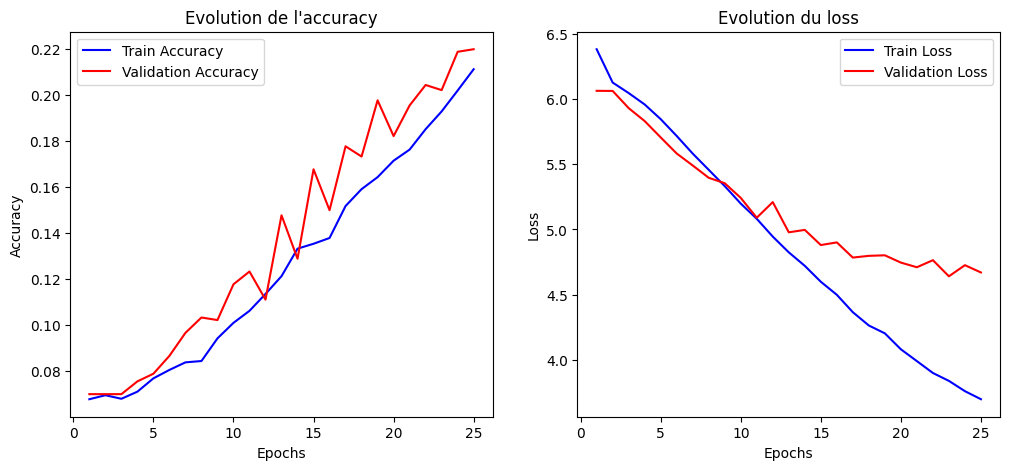

In [ ]:
# 2. J"imports les biblio
import os
import numpy as np
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 3. Variables
data_dir = 'lfw_funneled'
img_size = 64

# 4. Chargement des images
images = []
labels = []

for person_name in os.listdir(data_dir):
    person_folder = os.path.join(data_dir, person_name)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            try:
                img = Image.open(image_path).convert('RGB').resize((img_size, img_size))
                images.append(np.array(img))
                labels.append(person_name)
            except:
                print(f"Impossible de charger {image_path}")

print(f"Images chargées : {len(images)}")

# 5. Filtrage : seulement personnes avec ≥3 images
counts = Counter(labels)
filtered_images = []
filtered_labels = []

min_images = 3
for img, lbl in zip(images, labels):
    if counts[lbl] >= min_images:
        filtered_images.append(img)
        filtered_labels.append(lbl)

print(f"Images conservées (≥{min_images} par personne) : {len(filtered_images)}")

# 6. Préparation des données
X = np.array(filtered_images) / 255.0
le = LabelEncoder()
y_enc = le.fit_transform(filtered_labels)
y = to_categorical(y_enc)

# 7. Split train/test (20%) avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_enc
)

# 8. Split train/val (10% du train) – on ajuste pour éviter erreur
stratify_labels = np.argmax(y_train, axis=1)
val_size = max(0.148, len(np.unique(stratify_labels)) / len(y_train))  # ~14.8% ou + si nécessaire
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=val_size, random_state=42, stratify=stratify_labels
)

# 9. Augmentation de données
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_final)

# 10. Modèle CNN amélioré
model = Sequential([
    Input(shape=(img_size, img_size, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(y.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 11. Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# 12. Entraînement
history = model.fit(
    datagen.flow(X_train_final, y_train_final, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=25,
    callbacks=[early_stop]
)

# 13. Évaluation finale
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.2%}")

import matplotlib.pyplot as plt

# Récupérer les données d'accuracy et loss depuis history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Tracer Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Evolution de l\'accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Tracer Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Evolution du loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
from google.colab import files
uploaded = files.upload()

Saving lfw-funneled.tgz.zip to lfw-funneled.tgz.zip


In [10]:
# 1. Dézipper le fichier .zip
!unzip lfw-funneled.tgz.zip

# 2. Extraire le .tgz (archive tar gzip)
!tar -xvzf lfw-funneled.tgz

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
lfw_funneled/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw_funneled/Delphine_Chuillot/
lfw_funneled/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw_funneled/Paul_LeClerc/
lfw_funneled/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw_funneled/Eddie_Jordan/
lfw_funneled/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw_funneled/Lionel_Richie/
lfw_funneled/Lionel_Richie/Lionel_Richie_0001.jpg
lfw_funneled/Lionel_Richie/Lionel_Richie_0002.jpg
lfw_funneled/Jose_Viegas_Filho/
lfw_funneled/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw_funneled/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw_funneled/Roger_Mahony/
lfw_funneled/Roger_Mahony/Roger_Mahony_0001.jpg
lfw_funneled/Clay_Aiken/
lfw_funneled/Clay_Aiken/Clay_Aiken_0001.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0002.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0003.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0004.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0005.jpg
lfw_funneled/Clay_Aiken/

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from collections import Counter

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# 3. Paramètres
data_dir = 'lfw_funneled'
img_size = 160
min_images = 50  # Minimum 50 images par personne

# 4. Chargement des images et labels
images = []
labels = []

for person_name in os.listdir(data_dir):
    person_folder = os.path.join(data_dir, person_name)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            try:
                img = Image.open(image_path).convert('RGB').resize((img_size, img_size))
                images.append(np.array(img))
                labels.append(person_name)
            except:
                print(f"Erreur lors du chargement de {image_path}")

print(f"Images chargées : {len(images)}")

# 5. Filtrage
counts = Counter(labels)
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if counts[lbl] >= min_images:
        filtered_images.append(img)
        filtered_labels.append(lbl)

print(f"Images conservées (≥{min_images} images/pers.) : {len(filtered_images)}")

# 6. Préparation des données
X = np.array(filtered_images) / 255.0
le = LabelEncoder()
y_enc = le.fit_transform(filtered_labels)
y = to_categorical(y_enc)

# 7. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_enc
)

# 8. Data Augmentation plus agressive
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    shear_range=0.15,
    fill_mode='nearest'
)
datagen.fit(X_train)

# 9. MobileNetV2 + fine-tuning partiel
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))
base_model.trainable = True

# Geler toutes les couches sauf les 30 dernières pour fine-tuning
for layer in base_model.layers[:-30]:
    layer.trainable = False

# 10. Ajout du classifieur personnalisé
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(y.shape[1], activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 11. Compilation avec un LR bas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 12. Entraînement avec patience étendue
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stop]
)

# Courbes d’entraînement
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 13. Évaluation finale
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy améliorée : {acc * 100:.2f}%")


ModuleNotFoundError: No module named 'tensorflow'

Images chargées : 13233
Images conservées (≥50 images/pers.) : 1560


/tmp/ipython-input-1965539217.py:78: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.1840 - loss: 2.6743 - val_accuracy: 0.3109 - val_loss: 2.6496
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.3016 - loss: 2.3834 - val_accuracy: 0.3173 - val_loss: 2.5708
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.2794 - loss: 2.3461 - val_accuracy: 0.3173 - val_loss: 2.5411
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.2948 - loss: 2.3412 - val_accuracy: 0.3237 - val_loss: 2.5189
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.3370 - loss: 2.2541 - val_accuracy: 0.3237 - val_loss: 2.5007
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.3086 - loss: 2.2247 - val_accuracy: 0.3269 - val_loss: 2.4824
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.2922 - loss: 2.2942 - val_accuracy: 0.3269 - val_loss: 2.4736
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.2834 - loss: 2.3030 - val_accuracy: 0.3301 - val_loss:

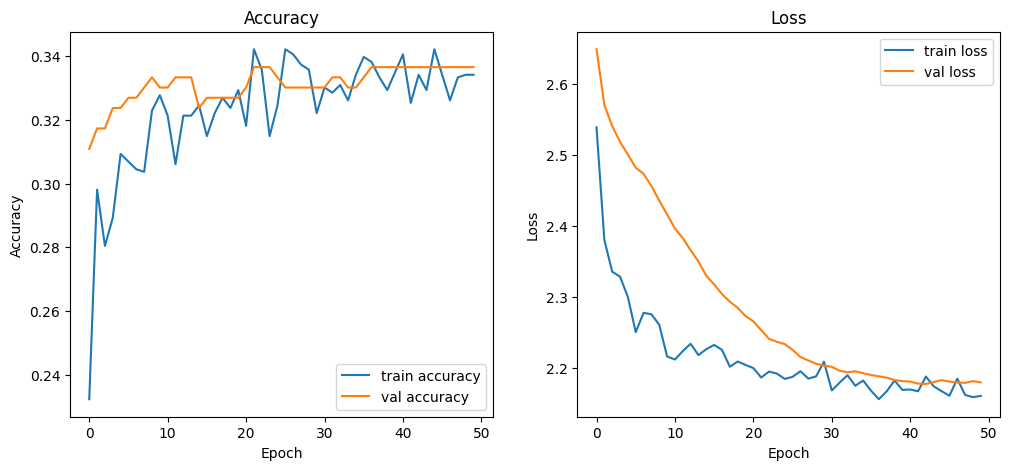

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 870ms/step - accuracy: 0.3230 - loss: 2.2476

✅ Test Accuracy améliorée : 33.65%


In [11]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from collections import Counter

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# 3. Paramètres
data_dir = 'lfw_funneled'
img_size = 160
min_images = 50  # Minimum 50 images par personne

# 4. Chargement des images et labels
images = []
labels = []

for person_name in os.listdir(data_dir):
    person_folder = os.path.join(data_dir, person_name)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            try:
                img = Image.open(image_path).convert('RGB').resize((img_size, img_size))
                images.append(np.array(img))
                labels.append(person_name)
            except:
                print(f"Erreur lors du chargement de {image_path}")

print(f"Images chargées : {len(images)}")

# 5. Filtrage
counts = Counter(labels)
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if counts[lbl] >= min_images:
        filtered_images.append(img)
        filtered_labels.append(lbl)

print(f"Images conservées (≥{min_images} images/pers.) : {len(filtered_images)}")

# 6. Préparation des données
X = np.array(filtered_images) / 255.0
le = LabelEncoder()
y_enc = le.fit_transform(filtered_labels)
y = to_categorical(y_enc)

# 7. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_enc
)

# 8. Data Augmentation plus agressive
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    shear_range=0.15,
    fill_mode='nearest'
)
datagen.fit(X_train)

# 9. MobileNetV2 + fine-tuning partiel
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))
base_model.trainable = True

# Geler toutes les couches sauf les 30 dernières pour fine-tuning
for layer in base_model.layers[:-30]:
    layer.trainable = False

# 10. Ajout du classifieur personnalisé
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(y.shape[1], activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 11. Compilation avec un LR bas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 12. Entraînement avec patience étendue
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stop]
)

# Courbes d’entraînement
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 13. Évaluation finale
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy améliorée : {acc * 100:.2f}%")

Images chargées : 13233
Images conservées (≥50 images/pers.) : 1560


/tmp/ipython-input-4134076117.py:71: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.1068 - loss: 3.4795 - val_accuracy: 0.1186 - val_loss: 2.6725 - learning_rate: 1.0000e-04
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.1177 - loss: 3.2822 - val_accuracy: 0.1474 - val_loss: 2.6356 - learning_rate: 1.0000e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.1055 - loss: 3.3107 - val_accuracy: 0.1378 - val_loss: 2.6860 - learning_rate: 1.0000e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.1110 - loss: 3.1812 - val_accuracy: 0.0962 - val_loss: 2.9503 - learning_rate: 1.0000e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.1221 - loss: 3.0736 - val_accuracy: 0.0801 - val_loss: 3.1426 - learning_rate: 1.0000e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.1316 - loss: 3.0613 - val_accuracy: 0.0769 - val_loss: 3.1078 - learning_rate: 1.0000e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.1522 

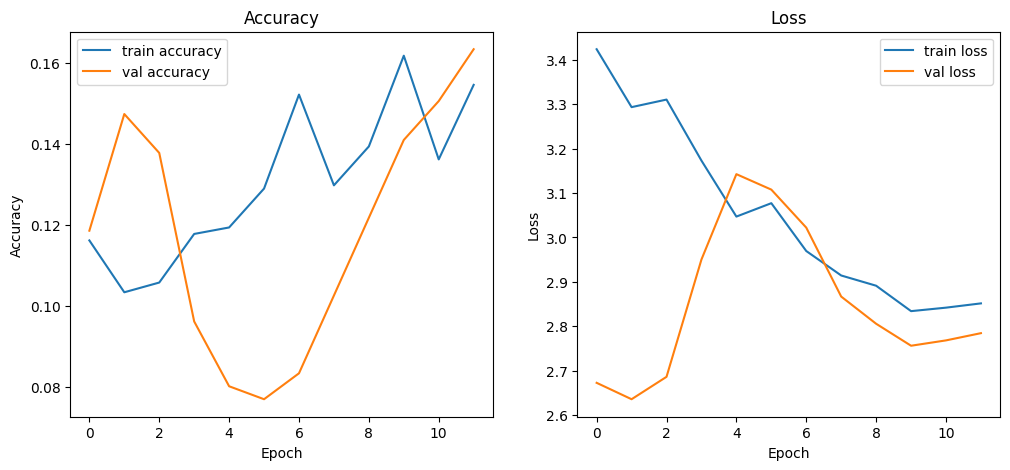

10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1662 - loss: 2.5531

✅ Test Accuracy : 14.74%


In [12]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from collections import Counter
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# --- Paramètres ---
data_dir = 'lfw_funneled'
img_size = 224  # plus grand pour mieux capturer les détails
min_images = 50

# --- Chargement des images ---
images, labels = [], []
for person_name in os.listdir(data_dir):
    person_folder = os.path.join(data_dir, person_name)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            try:
                img = Image.open(image_path).convert('RGB').resize((img_size, img_size))
                images.append(np.array(img))
                labels.append(person_name)
            except:
                print(f"Erreur lors du chargement de {image_path}")

print(f"Images chargées : {len(images)}")

# --- Filtrage des classes avec au moins min_images ---
counts = Counter(labels)
filtered_images = []
filtered_labels = []
for img, lbl in zip(images, labels):
    if counts[lbl] >= min_images:
        filtered_images.append(img)
        filtered_labels.append(lbl)

print(f"Images conservées (≥{min_images} images/pers.) : {len(filtered_images)}")

# --- Préparation ---
X = np.array(filtered_images) / 255.0
le = LabelEncoder()
y_enc = le.fit_transform(filtered_labels)
y = to_categorical(y_enc)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_enc
)

# --- Data Augmentation adaptée aux visages ---
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    fill_mode='nearest'
)
datagen.fit(X_train)

# --- MobileNetV2 + Fine-tuning ---
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)  # stabilisation
x = Dropout(0.4)(x)
predictions = Dense(y.shape[1], activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- Compilation ---
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# --- Entraînement ---
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stop, reduce_lr]
)

# --- Courbes ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# --- Évaluation ---
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy : {acc * 100:.2f}%")


In [5]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [6]:

!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [ ]:
# 3 test du CNN en utilisant le mobilev2net

# 2. j"Imports les biblio
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from collections import Counter

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 3. Paramètres
data_dir = 'lfw_funneled'
img_size = 160  # MobileNetV2 input size
min_images = 15  # Nombre minimum d’images par personne

# 4. Chargement des images et labels
images = []
labels = []

for person_name in os.listdir(data_dir):
    person_folder = os.path.join(data_dir, person_name)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            try:
                img = Image.open(image_path).convert('RGB').resize((img_size, img_size))
                images.append(np.array(img))
                labels.append(person_name)
            except:
                print(f"Erreur lors du chargement de {image_path}")

print(f"Images chargées : {len(images)}")

# 5. Filtrage : personnes avec suffisamment d'images
counts = Counter(labels)
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if counts[lbl] >= min_images:
        filtered_images.append(img)
        filtered_labels.append(lbl)

print(f"Images conservées (≥{min_images} images/pers.) : {len(filtered_images)}")

# 6. Préparation des données
X = np.array(filtered_images) / 255.0
le = LabelEncoder()
y_enc = le.fit_transform(filtered_labels)
y = to_categorical(y_enc)

# 7. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_enc
)

# 8. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# 9. Base MobileNetV2 (couches gelées)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))
base_model.trainable = False  # On gèle les couches pré-entraînées

# 10. Ajout du classifieur personnalisé
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(y.shape[1], activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 11. Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 12. Entraînement
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20,
    callbacks=[early_stop]
)

# 13. Évaluation finale
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc * 100:.2f}%")


Images chargées : 13233
Images conservées (≥15 images/pers.) : 3595


/tmp/ipython-input-3391934869.py:78: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.1055 - loss: 4.4604 - val_accuracy: 0.1947 - val_loss: 3.5908
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.1848 - loss: 3.6883 - val_accuracy: 0.2865 - val_loss: 3.1902
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 963ms/step - accuracy: 0.2450 - loss: 3.2979 - val_accuracy: 0.3310 - val_loss: 2.9585
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.2774 - loss: 3.1100 - val_accuracy: 0.3574 - val_loss: 2.6826
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.3058 - loss: 2.8250 - val_accuracy: 0.3797 - val_loss: 2.5472
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.3180 - loss: 2.7593 - val_accuracy: 0.4019 - val_loss: 2.4638
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.3338 - loss: 2.5974 - val_accuracy: 0.4186 - val_loss: 2.3534
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.3743 - loss: 2.4197 - val_accuracy: 0.4395 - val_l

In [ ]:
print(history.history.keys())
print(len(history.history['accuracy']), len(history.history['val_accuracy']))

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
25 25


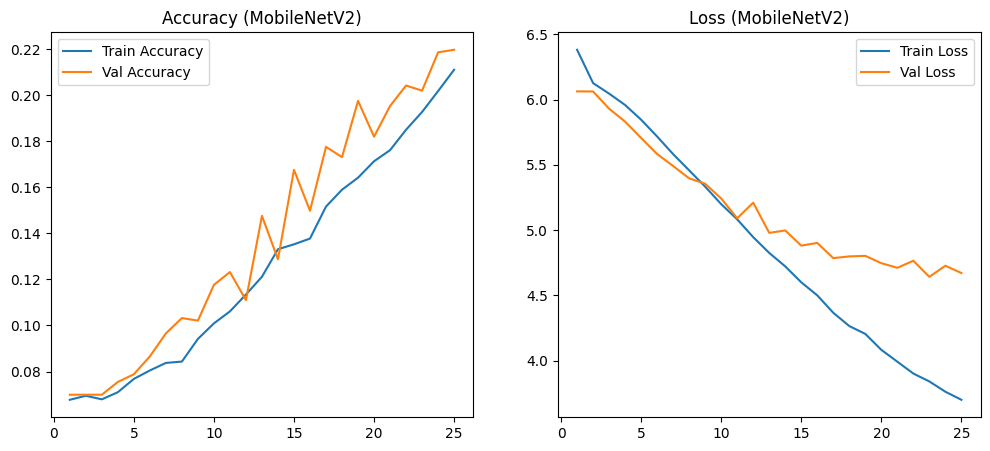

In [ ]:
import matplotlib.pyplot as plt

# Récupération des données
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_acc) + 1)

# Graphique accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy (MobileNetV2)')

# Graphique loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss (MobileNetV2)')

plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from collections import Counter

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# 3. Paramètres
data_dir = 'lfw_funneled'
img_size = 160  # MobileNetV2 input size
min_images = 15  # Nombre minimum d’images par personne

# 4. Chargement des images et labels
images = []
labels = []

for person_name in os.listdir(data_dir):
    person_folder = os.path.join(data_dir, person_name)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            try:
                img = Image.open(image_path).convert('RGB').resize((img_size, img_size))
                images.append(np.array(img))
                labels.append(person_name)
            except:
                print(f"Erreur lors du chargement de {image_path}")

print(f"Images chargées : {len(images)}")

# 5. Filtrage : personnes avec suffisamment d'images
counts = Counter(labels)
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if counts[lbl] >= min_images:
        filtered_images.append(img)
        filtered_labels.append(lbl)

print(f"Images conservées (≥{min_images} images/pers.) : {len(filtered_images)}")

# 6. Préparation des données
X = np.array(filtered_images) / 255.0
le = LabelEncoder()
y_enc = le.fit_transform(filtered_labels)
y = to_categorical(y_enc)

# 7. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_enc
)

# 8. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# 9. Base MobileNetV2 (couches gelées au départ)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))

# 10. Débloquer les dernières 20 couches pour fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Ajout du classifieur personnalisé
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(y.shape[1], activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 11. Compilation avec learning rate bas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 12. Entraînement avec EarlyStopping plus tolérant
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stop]
)

# Affichage des courbes loss et accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy au cours des epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss au cours des epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 13. Évaluation finale
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy améliorée : {acc * 100:.2f}%")


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
print(len(history.history['accuracy']), len(history.history['val_accuracy']))


25 25


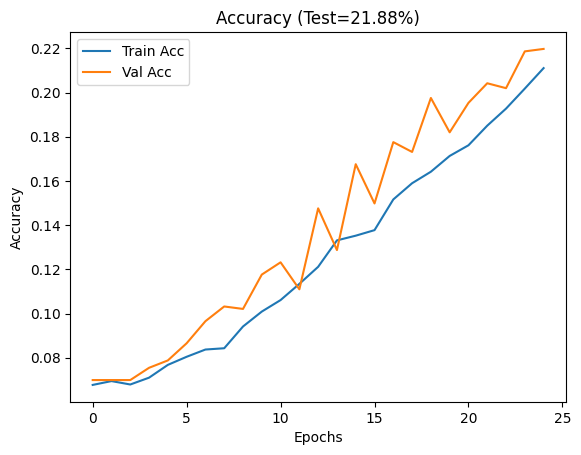

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title(f"Accuracy (Test={acc*100:.2f}%)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


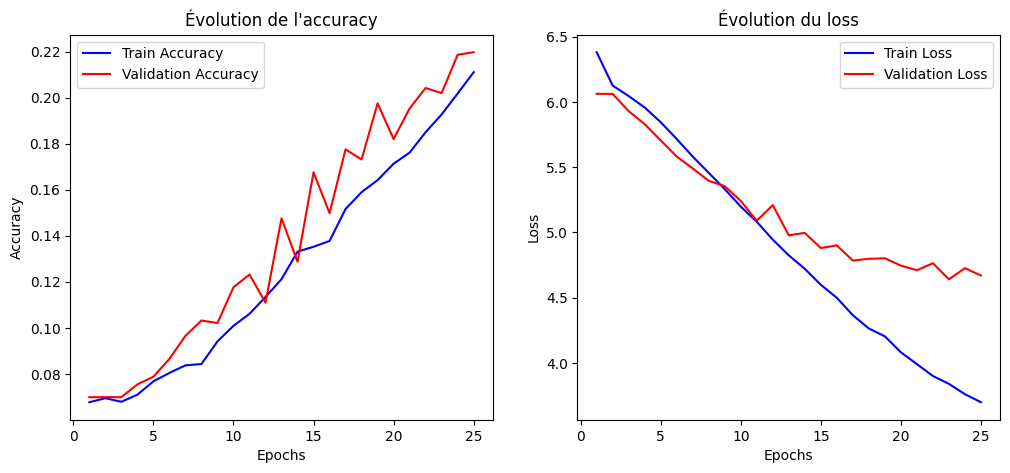

In [ ]:
import matplotlib.pyplot as plt

# Récupération des métriques
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(train_acc) + 1)

plt.figure(figsize=(12, 5))

# Graphique Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Train Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='red')
plt.title("Évolution de l'accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Graphique Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Train Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.title("Évolution du loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [ ]:
print(history.history.keys())
print(len(history.history['accuracy']), len(history.history['val_accuracy']))


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
25 25


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from collections import Counter

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# 3. Paramètres
data_dir = 'lfw_funneled'
img_size = 160
min_images = 50  # Minimum 50 images par personne

# 4. Chargement des images et labels
images = []
labels = []

for person_name in os.listdir(data_dir):
    person_folder = os.path.join(data_dir, person_name)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            try:
                img = Image.open(image_path).convert('RGB').resize((img_size, img_size))
                images.append(np.array(img))
                labels.append(person_name)
            except:
                print(f"Erreur lors du chargement de {image_path}")

print(f"Images chargées : {len(images)}")

# 5. Filtrage
counts = Counter(labels)
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if counts[lbl] >= min_images:
        filtered_images.append(img)
        filtered_labels.append(lbl)

print(f"Images conservées (≥{min_images} images/pers.) : {len(filtered_images)}")

# 6. Préparation des données
X = np.array(filtered_images) / 255.0
le = LabelEncoder()
y_enc = le.fit_transform(filtered_labels)
y = to_categorical(y_enc)

# 7. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_enc
)

# 8. Data Augmentation plus agressive
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    shear_range=0.15,
    fill_mode='nearest'
)
datagen.fit(X_train)

# 9. MobileNetV2 + fine-tuning partiel
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))
base_model.trainable = True

# Geler toutes les couches sauf les 30 dernières pour fine-tuning
for layer in base_model.layers[:-30]:
    layer.trainable = False

# 10. Ajout du classifieur personnalisé
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(y.shape[1], activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 11. Compilation avec un LR bas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 12. Entraînement avec patience étendue
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stop]
)

# Courbes d’entraînement
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 13. Évaluation finale
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy améliorée : {acc * 100:.2f}%")


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
pip install tensorflow


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from collections import Counter

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

# 3. Paramètres
data_dir = 'lfw_funneled'
img_size = 160
min_images = 50  # Minimum 50 images par personne

# 4. Chargement des images et labels
images = []
labels = []

for person_name in os.listdir(data_dir):
    person_folder = os.path.join(data_dir, person_name)
    if os.path.isdir(person_folder):
        for image_name in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_name)
            try:
                img = Image.open(image_path).convert('RGB').resize((img_size, img_size))
                images.append(np.array(img))
                labels.append(person_name)
            except:
                print(f"Erreur lors du chargement de {image_path}")

print(f"Images chargées : {len(images)}")

# 5. Filtrage
counts = Counter(labels)
filtered_images = []
filtered_labels = []

for img, lbl in zip(images, labels):
    if counts[lbl] >= min_images:
        filtered_images.append(img)
        filtered_labels.append(lbl)

print(f"Images conservées (≥{min_images} images/pers.) : {len(filtered_images)}")

# 6. Préparation des données
X = np.array(filtered_images) / 255.0
le = LabelEncoder()
y_enc = le.fit_transform(filtered_labels)
y = to_categorical(y_enc)

# 7. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_enc
)

# 8. Data Augmentation plus agressive
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    shear_range=0.15,
    fill_mode='nearest'
)
datagen.fit(X_train)

# 9. MobileNetV2 + fine-tuning partiel
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_size, img_size, 3)))
base_model.trainable = True

# Geler toutes les couches sauf les 30 dernières pour fine-tuning
for layer in base_model.layers[:-30]:
    layer.trainable = False

# 10. Ajout du classifieur personnalisé
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(y.shape[1], activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 11. Compilation avec un LR bas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 12. Entraînement avec patience étendue
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stop]
)

# Courbes d’entraînement
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 13. Évaluation finale
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy améliorée : {acc * 100:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: 'lfw_funneled'

In [ ]:
import tensorflow as tf
print(tf.__version__)


KeyboardInterrupt: 